In [1]:
# Imports
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# Exercises for Tuesday
***
# Exercise 1 : Work with a Kaggle dataset

For this exercise, you will work with a dataset from Kaggle website. For now, we stick to a simple one with no weird data: https://www.kaggle.com/datasets/yasserh/housing-prices-dataset

You download it, unzip the file and place it into the `data/week_2` folder. Then you can load you data set in the next cell.


In [2]:
# Load the data set
df = pd.read_csv('/Users/gaspardvilla/src/Nomades_ADA/data/week_2/housing.csv')
df.info()
df.describe()
df.sample(10)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 545 entries, 0 to 544
Data columns (total 13 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   price             545 non-null    int64 
 1   area              545 non-null    int64 
 2   bedrooms          545 non-null    int64 
 3   bathrooms         545 non-null    int64 
 4   stories           545 non-null    int64 
 5   mainroad          545 non-null    object
 6   guestroom         545 non-null    object
 7   basement          545 non-null    object
 8   hotwaterheating   545 non-null    object
 9   airconditioning   545 non-null    object
 10  parking           545 non-null    int64 
 11  prefarea          545 non-null    object
 12  furnishingstatus  545 non-null    object
dtypes: int64(6), object(7)
memory usage: 55.5+ KB


,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus
230,4690000,5400,2,1,2,yes,no,no,no,no,0,yes,semi-furnished
434,3290000,3792,4,1,2,yes,no,no,no,no,0,no,semi-furnished
366,3675000,3630,2,1,1,yes,no,yes,no,no,0,no,furnished
50,7420000,7440,3,2,4,yes,no,no,no,no,1,yes,unfurnished
198,4935000,5948,3,1,2,yes,no,no,no,yes,0,no,semi-furnished
460,3087000,8100,2,1,1,yes,no,no,no,no,1,no,unfurnished
342,3850000,7152,3,1,2,yes,no,no,no,yes,0,no,furnished
46,7525000,6000,3,2,4,yes,no,no,no,yes,1,no,furnished
481,2940000,2700,2,1,1,no,no,no,no,no,0,no,furnished
493,2800000,3960,3,1,1,yes,no,no,no,no,0,no,furnished


**Question 1:** Differentiates the categoric and numerical variables. Would you consider the `bathrooms` or `parking` as continuous features ?

In [3]:
# Your code here
numericals = ['price', 'area', 'bedrooms', 'bathrooms', 'stories', 'parking']
categoricals = ['mainroad', 'guestroom', 'basement', 'hotwaterheating', 'airconditioning', 'prefarea', 'furnishingstatus']

# Replace yes and no with 1 and 0
for cat in categoricals:
    df.loc[df[cat] == 'yes', cat] = 1
    df.loc[df[cat] == 'no', cat] = 0
df.sample(5)



,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus
408,3430000,4000,2,1,1,1,0,0,0,0,0,0,unfurnished
142,5600000,10500,4,2,2,1,0,0,0,0,1,0,semi-furnished
323,4025000,5400,3,1,1,1,0,0,0,0,3,0,semi-furnished
529,2275000,3970,3,1,2,1,0,1,0,0,0,0,unfurnished
540,1820000,3000,2,1,1,1,0,1,0,0,2,0,unfurnished


**Question 2:** Univariate analysis. Explore this dataset and build the most suitable plots for each feature.

Text(0.5, 1.0, 'Bathrooms')

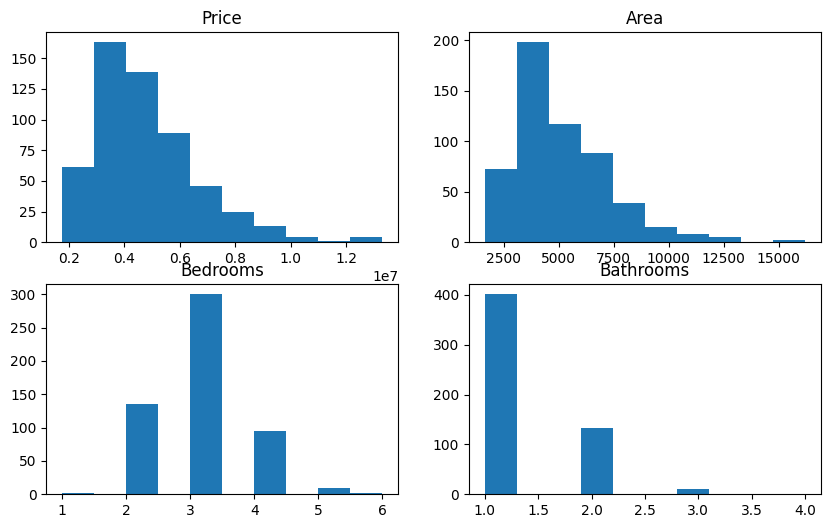

In [4]:
# Your code here
fig, axs = plt.subplots(2, 2, figsize=(10, 6))
axs[0, 0].hist(df['price'])
axs[0, 0].set_title('Price')
axs[0, 1].hist(df['area'])
axs[0, 1].set_title('Area')
axs[1, 0].hist(df['bedrooms'])
axs[1, 0].set_title('Bedrooms')
axs[1, 1].hist(df['bathrooms'])
axs[1, 1].set_title('Bathrooms')



**Question 3:** Bivariate analysis. Explore the relationships between the features and use the right plots to highlights these relationships.
NB: Which feature is the most interesting in this dataset ? With which other features would it be interesting to compare it ? 

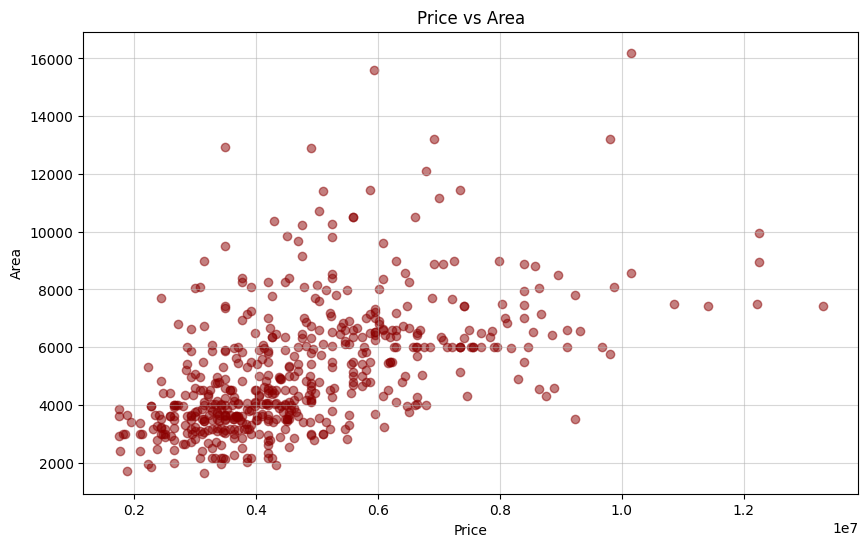

In [5]:
# Your code here
plt.figure(figsize=(10, 6))
plt.scatter(df['price'], df['area'], color = 'darkred', alpha = 0.5)
plt.xlabel('Price')
plt.ylabel('Area')
plt.grid(True, alpha=0.5)
plt.title('Price vs Area')
plt.show()


**Question 4:** Multivariate analysis. Is there one or more plot that display more than 2 features in one plot ? 

In [6]:
# Your code here
# Create combinations as new categorical variables
df['bed_bath_stories'] = [f"{row['bedrooms']}/{row['bathrooms']}/{row['stories']}" for _, row in df.iterrows()]

# Create mapping from unique values to indices
unique = df['bed_bath_stories'].unique()

# Dict that assigns each unique value to an index
mapping = {combo: idx for idx, combo in enumerate(unique)}

# Apply the mapping
df['yolo'] = df['bed_bath_stories'].map(mapping)
df.sample(5)

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus,bed_bath_stories,yolo
375,3640000,5960,3,1,2,1,1,1,0,0,0,0,unfurnished,3/1/2,9
320,4060000,4320,3,1,2,1,0,0,0,0,2,1,furnished,3/1/2,9
403,3500000,12944,3,1,1,1,0,0,0,0,0,0,unfurnished,3/1/1,12
402,3500000,5880,2,1,1,1,0,0,0,0,0,0,unfurnished,2/1/1,19
269,4375000,3900,3,1,2,1,0,0,0,0,0,0,unfurnished,3/1/2,9


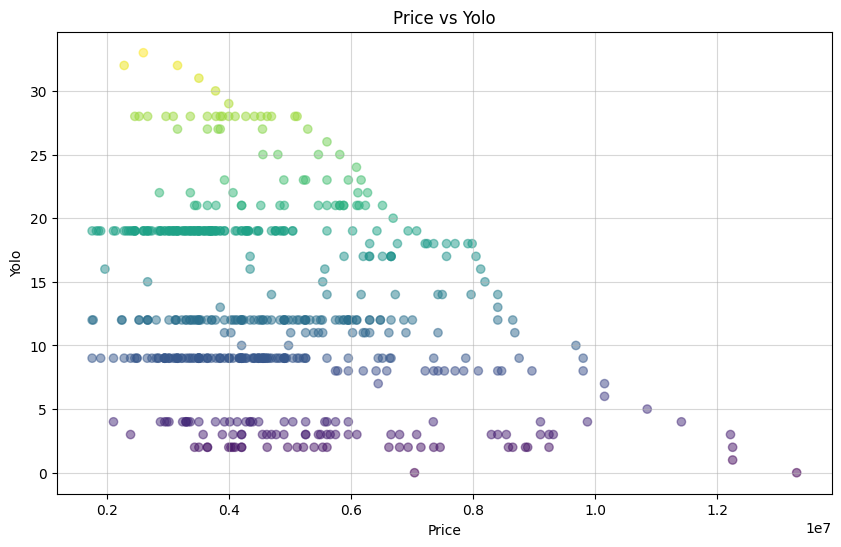

In [7]:
# Plot the price for each yolo
plt.figure(figsize=(10, 6))
plt.scatter(df['price'], df['yolo'], c = df['yolo'], alpha = 0.5)
plt.xlabel('Price')
plt.ylabel('Yolo')
plt.grid(True, alpha=0.5)
plt.title('Price vs Yolo')
plt.show()